# Preface
> The questions/exercises given for the assignment has been repeated in this notebook, they have been put in bold. Our answers and explanations have been indented, or printed from the executed code, to easily distinguish them from the exercise text. Throughout the text we are using good guys and heroes synonymously and bad guys and villains synonymously. We also use the word alignment(s) to refer to good and bad collectively.

## Imports
> The following imports are needed throughout the notebook:

In [1]:
import csv
import os
import nltk
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import statistics
import numpy as np
import random
import math
import pandas as pd
import json
import urllib.request
import powerlaw

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from community import community_louvain
from collections import Counter
from os import listdir
from bs4 import BeautifulSoup
from fa2 import ForceAtlas2

## Data

> The downloaded files can be found in the folders `dc` and `marvel`, in our [github project](https://github.com/pete414n/02805SG/tree/main/assignment2).

# Basic Stats

**Write a short paragraph describing the network. The paragraph should contain the following information**
- **The number of nodes and links.**

In [2]:
#Edgelist saved as gml so we can keep the node attributes
G = nx.read_gml("superhero.edgelist")

In [3]:
# Number of nodes
num_nodes = len(G.nodes())
print(f"Number of nodes = {num_nodes}")

# Number of links
num_links = len(G.edges()) # Assuming we get an edge list
print(f"Number of links = {num_links}")

Number of nodes = 1622
Number of links = 19068


- **The average, median, mode, minimum and maximum value of the network's in-degree.s And of the out-degrees.**

In [4]:
# Making a sorted list of the in degrees and a list of the out degrees
in_degree_list = sorted([d for (c, d) in G.in_degree], reverse=True)
out_degree_list = sorted([d for (c, d) in G.out_degree], reverse=True)

# Average in degree
print(f"average in degree = {np.mean(in_degree_list)}")

# Average out degree
print(f"average out degree = {np.mean(out_degree_list)}")

average in degree = 11.755856966707768
average out degree = 11.755856966707768


In [5]:
# Median in degree
print(f"median in degree = {np.median(in_degree_list)}")

# Median out degree
print(f"median out degree = {np.median(out_degree_list)}")

median in degree = 5.0
median out degree = 9.0


In [6]:
# Mode in degree
mode = max(set(in_degree_list), key=in_degree_list.count)
print(f"mode in degree = {mode}")

# Mode out degree
mode = max(set(out_degree_list), key=out_degree_list.count)
print(f"mode out degree = {mode}")

mode in degree = 0
mode out degree = 2


In [7]:
# Since we have the sorted list, the first element will be the max and the last will be the min
# Minimum and maximum in degree
min_in_degree = in_degree_list[-1]
max_in_degree = in_degree_list[0]
print(f"minimum in degree = {min_in_degree}\nmaximum in degree = {max_in_degree}\n")

# Minimum and maximum out degree
min_out_degree = out_degree_list[-1]
max_out_degree = out_degree_list[0]
print(f"minimum out degree = {min_out_degree}\nmaximum out degree = {max_out_degree}\n")

minimum in degree = 0
maximum in degree = 429

minimum out degree = 0
maximum out degree = 68



> When creating the network we have tried to get the wikitext as clean as possible and only have the true text without i.e. the contents list. 
We have created the network so the nodes contains 3 attributes - universe, txtlength and sentiment. The first one tells whether it's a DC or Marvel character, the next gives the length of the whole wikitext and the last gives the sentiment value of the wikitext. 
We have chosen not to include all the characters with pages that were redirects. We have done this by checking if the text belonging to the given character were starting with #redirect, if so we didn't include this node in the network. We have also removed all nodes who had a sentiment value of 0. Then we have removed isolates from the network and found the largest connected component. 

> Our network has 1602 nodes and 19068. The average in- and out-degree are both 11.75, they are the same since each edge contributes one to the total out-degree and one to the total in-degree, and a difference would indicate that there somehow where a higher total in-degree than a total out-degree, or vice versa. The median in degree is 5, and the median out degree is 9. The mode for in degree is 0, which corresponds to characters that link to other characters, but are not linked to by anyone else. The mode for out degree is 2. These two numbers tells us that the most common in- and out-degree is relatively low, considering the total number of nodes. The minimum in- and out-degree are both 0, an out-degree of 0 corresponds to a character that links to no other characters, but is linked to by at least one other character. The maximum in-degree is 429, this is the character that most other characters are linking to, corresponding to roughly 1/4 of all of our nodes linking to this single node. The maximum out degree is 68, which corresponds to the character that has the most links to other characters. Overall these numbers indicates to us that the graph is not very dense, since it looks like we (might) have quite a few nodes that do not have many edges going in or out of them. At the same time this also indicates that we must have some nodes that have many links, relatively to the others. 

**We also want the degree distributions and a plot of the network**
- **Create and visualize in- and out-going degree distributions as described in Lecture 4. Think about which axes you should use - loglog is great for power-law distributions, but not necessarily for Poisson-like degree distributions**

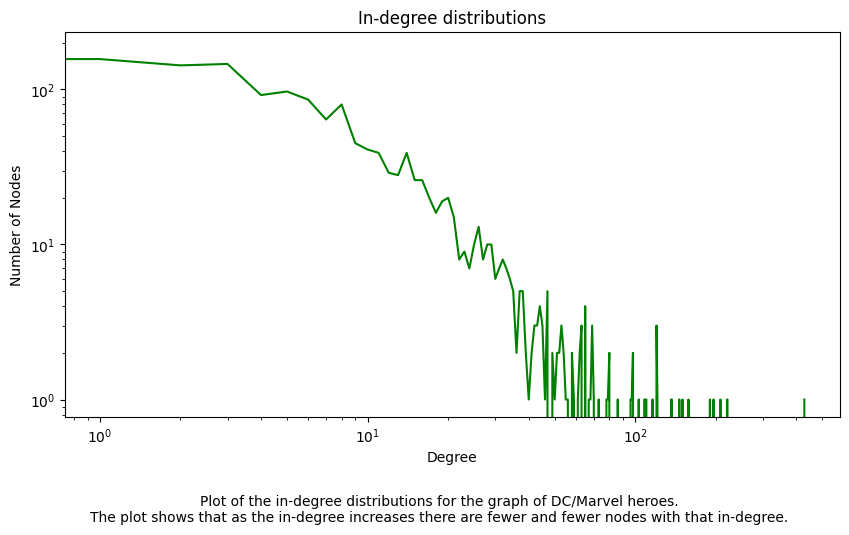

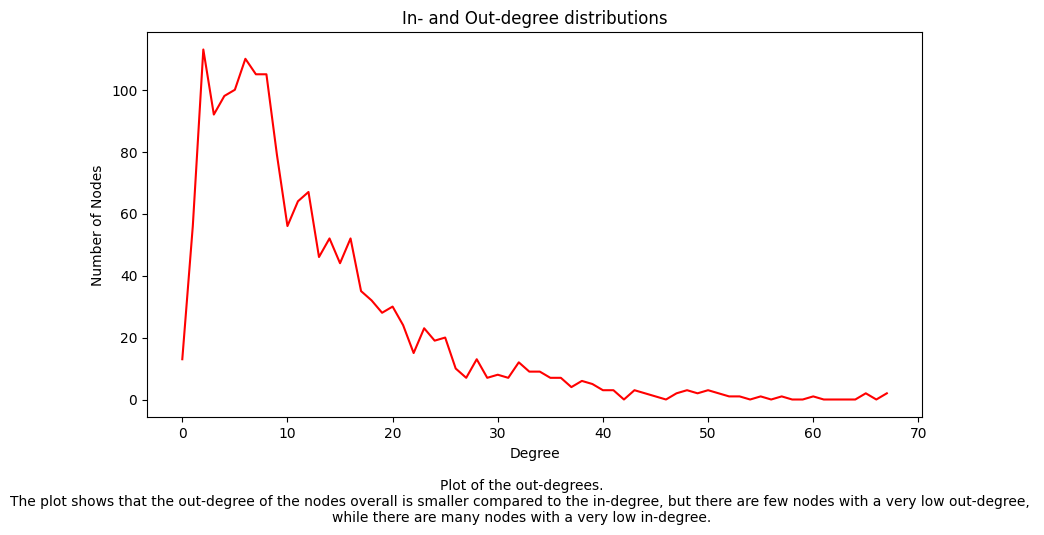

In [8]:
# Adjusting size of figures
plt.rcParams['figure.figsize'] = [10, 5]

# Creating the degree distirbution for in and out degress
in_counts, in_bins = np.histogram(in_degree_list, bins=max_in_degree)
out_counts, out_bins = np.histogram(out_degree_list, bins=max_out_degree)

#Plotting the in-degree distribution with log-log axes 
#as the in-degree distribution is much like a power-law distribution
plt.plot(in_bins[:-1], in_counts, color = 'green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In-degree distributions')
plt.figtext(.5, -0.1, f"Plot of the in-degree distributions for the graph of DC/Marvel heroes.\nThe plot shows that as the in-degree increases there are fewer and fewer nodes with that in-degree.", ha="center")
plt.show()

#Plotting the out-degree distribution with normal axes 
#as the out-degree distribution is much like a Poisson distribution
plt.plot(out_bins[:-1], out_counts, color = 'red')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('In- and Out-degree distributions')
plt.figtext(.5, -0.1, f"Plot of the out-degrees.\nThe plot shows that the out-degree of the nodes overall is smaller compared to the in-degree, but there are few nodes with a very low out-degree, \nwhile there are many nodes with a very low in-degree.", ha="center")
plt.show()

> The in- and out-degree plots seem to support what we initially suspected, that we have many nodes with very low, or zero, in-degree. We also see that there are few nodes with an out-degree of zero or one, this is also what we expected. It seems that the out-degree distribution could follow a Poisson-distribution.

- **Estimate, report, and reflect on the slope and starting value of the incoming degree distribtion's power law using the tools described in Lecture 5 - and display the fit on top of your incoming degree-distribution plot**

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.7447676975006194


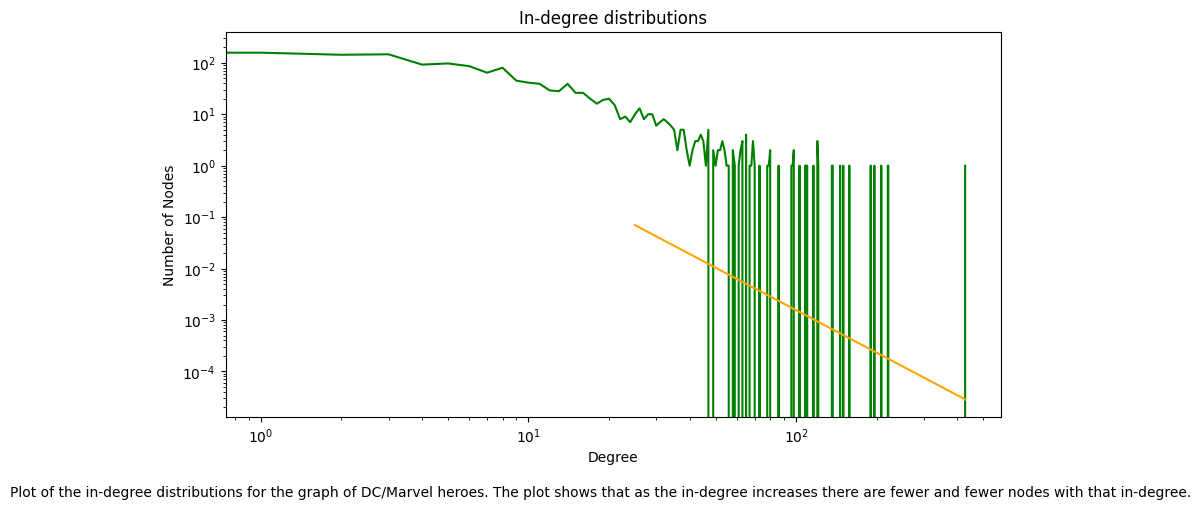

In [9]:
#alpha = powerlaw.Fit(in_degree_list).alpha # in- or out-degree?
fit = powerlaw.Fit(in_degree_list)
print(fit.alpha)
# Creating the degree distirbution for in and out degress
in_counts, in_bins = np.histogram(in_degree_list, bins=max_in_degree)

#Plotting the in-degree distribution with log-log axes 
#as the in-degree distribution is much like a power-law distribution
plt.plot(in_bins[:-1], in_counts, color = 'green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
#plt.ylim(0.5,1000)
plt.ylabel('Number of Nodes')
plt.title('In-degree distributions')
plt.figtext(.5, -0.05, f"Plot of the in-degree distributions for the graph of DC/Marvel heroes. The plot shows that as the in-degree increases there are fewer and fewer nodes with that in-degree.", ha="center")
ax = plt.gca()
fit.power_law.plot_pdf(ax=ax, color='orange')

plt.show()

> From the value of alpha we can see that the in-degrees belong to a power-law distribution. As mentioned in the network book section 4.7, if gamma (which is the same as alpha) is between 2 and 3 it is a scale free regime. 

- **Plot the network using the Force Atlas algorithm as described in Lecture 5.**

In [10]:
# Making the graph undirected for the plotting
uG = G.to_undirected()

# Lists to contain nodes belonging to DC and Marvel
dc_nodes = []
marvel_nodes = []

#Lists to contain the degrees for the DC nodes and the Marvel nodes. To be used when plotting using the Force Atlas
dc_degrees = []
marvel_degrees = []

# Dividing nodes in Marvel and DC universe
for n in uG.nodes():
    if uG.nodes[n]['universe'] == 'Marvel':
        marvel_nodes += [n]    
        marvel_degrees += [uG.degree[n]]
    else:
        dc_nodes += [n]
        dc_degrees += [uG.degree[n]] 

100%|███████████████████████████████████████| 2000/2000 [01:11<00:00, 28.13it/s]


BarnesHut Approximation  took  17.14  seconds
Repulsion forces  took  48.35  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.40  seconds
AdjustSpeedAndApplyForces step  took  2.62  seconds


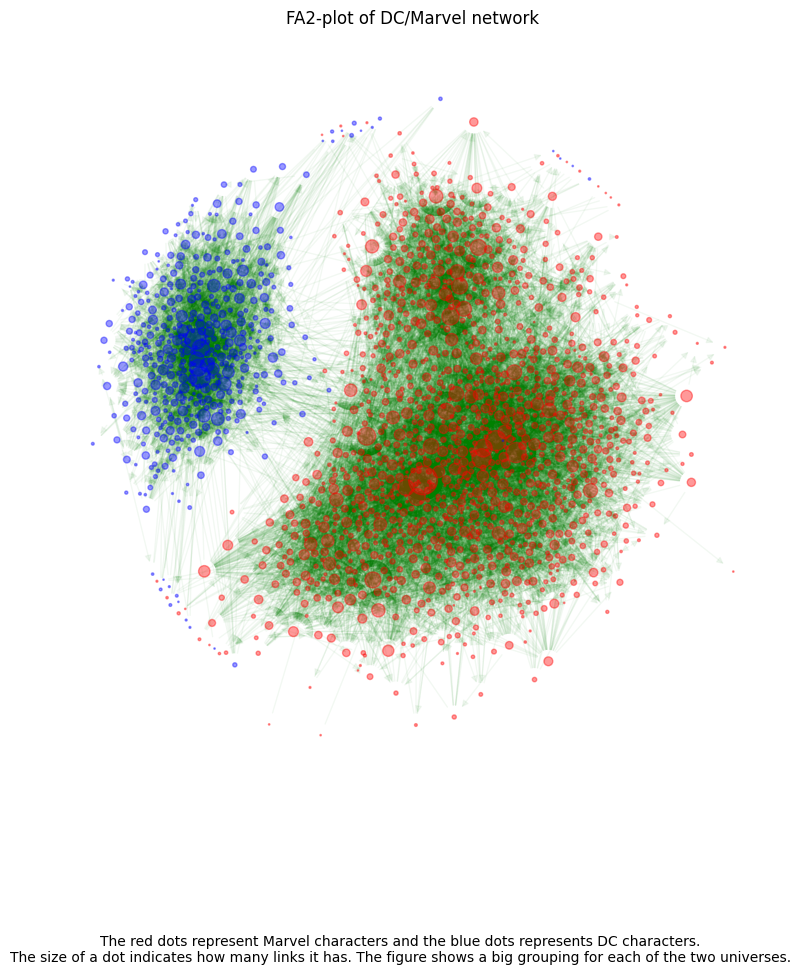

In [11]:
# Adjusting figure size
plt.rcParams['figure.figsize'] = [10, 10]

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2, # original 1.2
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=True,
                        gravity=0.1, # original 0.5

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, nodelist = marvel_nodes, node_size=marvel_degrees, node_color="red", alpha=0.4)
nx.draw_networkx_nodes(G, positions, nodelist = dc_nodes, node_size=dc_degrees, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.title('FA2-plot of DC/Marvel network')
plt.figtext(.5, -0.05, f"The red dots represent Marvel characters and the blue dots represents DC characters.\nThe size of a dot indicates how many links it has. The figure shows a big grouping for each of the two universes.", ha="center")

plt.show()

>From the plot above it is clear to see that we have two groupingss in our data. These groupings are formed by which text link to each other. As such it is expected to see these two groups, representing that the Marvel texts in general have more links to other Marvel texts, and similarly for the DC text. But as can be see there are also links across the two groupings, indicating that some texts are from one universe and linking to text(s) from the other. 

In [12]:
# Adjusting figure size to default 
plt.rcParams['figure.figsize'] = [8.0, 6.0]

# Communities

**Identify the communities in one or both of the superhero universes (DC/Marvel) as described in Week 7.**

> We will be focusing on the DC superhero universe. We start by recreating our graph for just the DC characters:

In [13]:
#Creating the DC network
dc_G = uG.subgraph(dc_nodes)

In [14]:
# Example from: https://perso.crans.org/aynaud/communities/
#first compute the best partition
partition = community_louvain.best_partition(dc_G)

In [15]:
partition_list = []
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    partition_list.append(list_nodes)
partition_list = sorted(partition_list, key=len, reverse=True)

**Visualize the communities by coloring the graph's nodes according to community affiliation - also as described in Week 7.**

100%|███████████████████████████████████████| 2000/2000 [00:25<00:00, 79.01it/s]


BarnesHut Approximation  took  2.76  seconds
Repulsion forces  took  19.92  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  1.15  seconds
AdjustSpeedAndApplyForces step  took  0.69  seconds


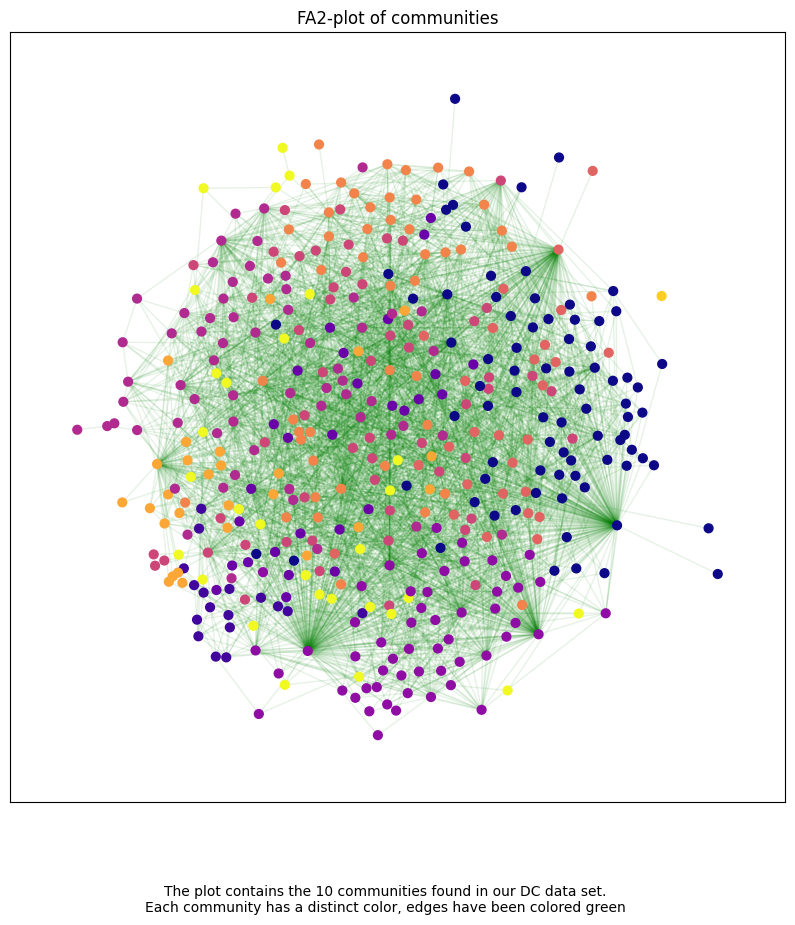

In [16]:
# Adjusting figure size
plt.rcParams['figure.figsize'] = [10, 10]

#drawing using ForceAtlas
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=0.1,

                        # Performance
                        jitterTolerance=0.5,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.5, # original 0.5
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=10.0,
                        strongGravityMode=True,
                        gravity=0.1,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(dc_G, pos=None, iterations=2000)
cmap = plt.get_cmap('plasma', max(partition.values()) + 1)

nx.draw_networkx_nodes(dc_G, positions, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(dc_G, positions, edge_color='green', alpha=0.1)
plt.title('FA2-plot of communities')
plt.figtext(.5, 0, f"The plot contains the 10 communities found in our DC data set.\nEach community has a distinct color, edges have been colored green", ha="center")
plt.show()


In [17]:
# Adjusting figure size to default
plt.rcParams['figure.figsize'] = [8.0, 6.0]

**Write a paragraph about your work to identify the communities. The paragraph should include**
- **Information about the algorithm you used to find communities.**
- **The value of modularity for your network.**
- **The number of communities and their sizes (in terms of number of nodes).**

> We have chosen to work only on the DC network. We have used the Louvain algorithm to find the communities. As can be seen in the code below the modularity of the network is 0.30. As shown in the network science book section 9.4 if the modularity is 0.41 it is an optimal partition and if the modularity is 0.22 it is a suboptimal partition. Our value is in between those, so we at least have an suboptimal partition and almost an optimal partition. 
The network have 10 communitites in total, the smalles community have a size of 1 and the largest is 80. The sizes of each community can be seen below. 

In [18]:
modularity = nx.algorithms.community.modularity(dc_G, partition_list)
print('The modularity is: ' + str(modularity))

The modularity is: 0.3031351535737237


In [19]:
print("There are " + str(len(partition_list)) + " communities in total")

print("The size of each community are:")
for sublist in partition_list:
    print(len(sublist))

There are 11 communities in total
The size of each community are:
80
63
55
54
48
29
28
27
27
17
1


**For the 10 largest communities, process the text in order to create a TF-IDF vector for each community. Explain in your own words how TF-IDF works.**

>Term Frequency–Inverse Document: Can be used to determine which words give most information in a text. TF tells us if the given word occurs frequent. IDF tells us if the given word appears in many of the documents of the corpus. If a word is very frequent in a few documents, then it is probably because it is specific to that document and hence is used to convey some specific information. If on the other hand it is a frequent word in many documents, then it is probably just a stopword or similar, and hence does not give much information about the specific document.

In [20]:
#Putting together the text from the pages belonging to each community
community_texts = []
maxrange = 0
#if we have less than 10 communities
if len(partition_list) < 10:
    maxrange = len(partition_list)
else:
    maxrange = 10
    
for sublist in partition_list[:maxrange]:
    com_txt = []
    for character in sublist:
        f = open("./dc/"+character+".txt")
        raw = f.read()
        tokens = nltk.wordpunct_tokenize(BeautifulSoup(raw, 'html.parser').get_text())
        file_text = [w.lower() for w in tokens if w.isalpha()]
        com_txt = com_txt + file_text
    community_texts.append(com_txt)

stopwords = nltk.corpus.stopwords.words('english')

community_strings = []
for txt in community_texts:
    com_words = [w for w in txt if w not in stopwords]
    community_strings.append(com_words)

In [21]:
unique_terms = []
for community_words in community_strings:
    unique_terms.append(list(set(community_words)))

In [22]:
def idf(word, unique_list):
    N = len(unique_list)
    term_appears = 0
    for sublist in unique_list:
        if word in sublist:
            term_appears+=1
    idf_val = math.log(N/(1+term_appears))+1
    return idf_val

In [23]:
# Creating the tf list
tfidf_list = []

for community_words in community_strings:
    fdist = FreqDist(community_words)
    total_terms = len(community_words)
    tfidf=[]
    for word in fdist:
        idf_val = idf(word, unique_terms)
        tf_val = fdist[word]/total_terms
        tfidf_elem=(word, tf_val*idf_val)
        tfidf.append(tfidf_elem)
    tfidf_list.append(tfidf)


**Then visualize the TF-IDF vectors using wordclouds (as described in Week 7). Remember to comment on your word-clouds (e.g. in the figure captions): Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.**

In [ ]:
fig = plt.figure()
#plt.rcParams['figure.figsize'] = [20, 10]
captions = ["Batman",
            "Justice League 1",
            "Superman",
            "Justice League 2",
            "Vandal Savage",
            "Green Lantern",
            "Teen Titans",
            "Wonder Woman",
            "Legion of Super-Heroes",
            "Outsiders"]

for i in range(len(tfidf_list)):
    ax = fig.add_subplot(5,2,i+1)
    wordcloud = WordCloud(background_color='black', width=2200,
                      height=1800, collocations=False).generate_from_frequencies(dict(tfidf_list[i]))

    ax.imshow(wordcloud)
    ax.text(0.5,-0.1, captions[i], size=12, ha="center", 
         transform=ax.transAxes)
    ax.axis('off')
plt.show()

> Below each wordcloud there is a caption corresponding to what we believe the community is formed around. The wordclouds are discussed individually below. We are not comic book experts, but we have tried to reference the characters, places etc as correctly as we can, from the words in the wordclouds. Overall we would say that the wordclouds allows us to understand the communities, but it is a bit odd that it seems like we have two communities for Justice League.
>- **Batman**: This community is for Batman. We see Batman, Gothman, DC Comics (dc and comics), and some of the recurring characters in the word cloud, such as Selena Kyle/Catwoman (selana) and Harley Quinn (harley).
>- **Justice League 1**: This community is for one instance of Justice league. This Justice League has focus on Isis and the Martian Manhunter/J'onn J'onzz (onzz). There are also other characters from Justice League such as Shazam. 
>- **Superman**: This community is Superman. There are several of the recurring characters such as Supergirl, Jimmy Olsen (olsen), and Lex Luthor represented in the word cloud.
>- **Justice League 2**: This community is for the other instance of Justice League. This Justice League seems to be more focused on all of the members such as Green Lantern (green), Green Arrow (green and arrow), Aquaman, etc. 
>- **Vandal Savage**: This community surrounds Vandal Savage (vandal and savage). A recurring villain for multiple DC heroes, and as such we see multiple heroes such as the Flash, Justice League (justice), Batman.
>- **Green Lantern**: This community could be for the Green Lantern. We see Green Lantern, but also the Green Lantern Corps (corps), the Justice League (league), Hal Jordan (jordan), Universe etc.
>- **Teen Titans**: Teen Titans is another super-hero team, and we see many of the super heroes and villains appear here: cyborg, raven, slade, deathstroke, batman etc.
>- **Wonder Woman**: Here we have Wonder Woman as the central character, and we have several words that relate to the character such as her mother Hippolyta, Diana, Justice League (justice), and Cheetah a recurring villain. And more.
>- **Legion of Super-Heroes**: Another super-hero team. A cursory search tells us that there are several versions of this team, some of which has Superman as a member, hence it seems reasonable that we also see Brainiac, a recurring villain for Superman, and Superman. It also seems to connect to the Watchmen universe.
>- **Outsiders**: ANOTHER super-hero team, formed around Batman and based in Markovia, which can be found in the wordcloud. We also see some of the characters Black Lightning (black and lightning), Batman, Katana, Geo-Force (geo and force).

# Sentiment

**First calculate the sentiment for all character pages. Calculate the mean value of the sentiment and the 10th and 90th percentile values for the sentiment. Then create a nice histogram displaying the distribution of sentiment values for all pages. Indicate the mean, etc on that histogram.**

> The following code shows how we have calculated and found sentiments for the different files, but since we had to store the graph as an edgelist, this had to be done before we got to this part of the assignment.
We start by preparing the data from the files that have been given for the exercise. First we make a list of all the words from the given sentiment list with their associated average happiness score:

In [25]:
# Create an empty list to store tuples of words and their 
# average happiness score
sent_list = []

# Read in the .tsv file
with open("dataset_s1.tsv", "r", encoding="utf8") as sent_file:
    tsv_reader = csv.DictReader(sent_file, delimiter="\t")
    # For each sentiment in the file, save the word and average happiness in a tuple
    # and add it to the list
    for sent in tsv_reader:
        word = sent["word"]
        average = sent["happiness_average"]
        sent_list.append((word, average))

> Then we create a function to calculate the sentiment from a frequency distribution for a given file:

In [26]:
# Function for calculating the sentiment of a file from the frequency distribution for that file
def sentiment(tokens):
    # Total sentiment score of file
    sent_sum = 0.0
    # Total number of occurences of words
    occ_sum = 0
    
    # For each token and associated number of occurences
    for token, occ in tokens.items():
        # If the token is in the given list of words with rated happiness
        for word, score in sent_list:
            if token == word:
                sent_sum += (float(score) * occ)
                occ_sum += occ
    return sent_sum / occ_sum

> We have added an attribute sentiment to the nodes, and as the other attributes were set for each node, the sentiment for that node was calculated using the above `sentiment`function. We then create a list of tuples, where each tuple contains a character name and the associated sentiment:

In [27]:
sentiments = nx.get_node_attributes(G, "sentiment")

> We are now ready to calculate the mean, 10th percentile, and the 90th percentile:

In [28]:
#Source: https://stackoverflow.com/questions/2374640/how-do-i-calculate-percentiles-with-python-numpy
# mean
mean_total = np.mean(list(sentiments.values()))

# 10th percentile
per_10th = np.percentile(list(sentiments.values()), 10)

# 90 percentile sentiment 
per_90th =  np.percentile(list(sentiments.values()), 90)

> We are now able to make the histogram with the distribution and the calculated values:

Calculated values:
mean: 1.782296221318552
10th percentile: 1.130908256709424
90th percentile: 2.382504660452729


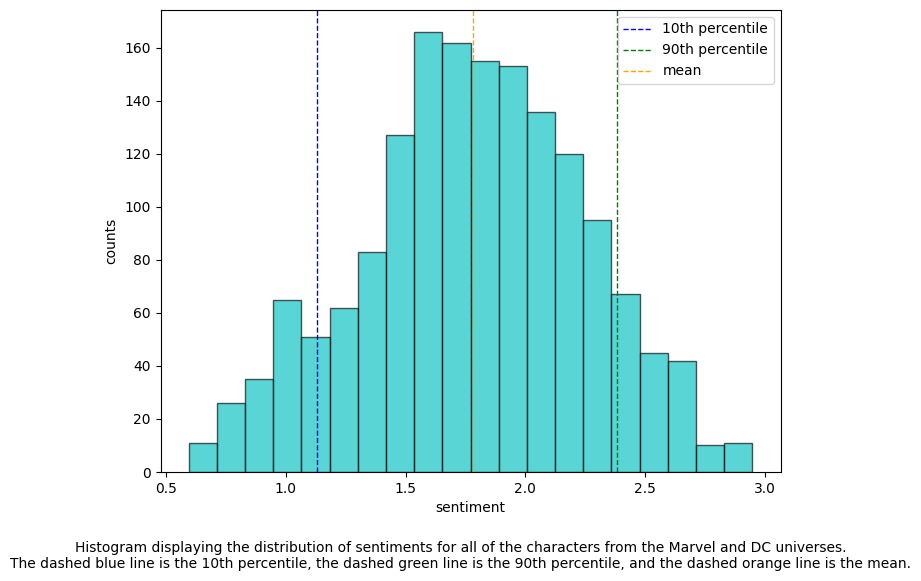

In [29]:
# Adjust size
plt.rcParams['figure.figsize'] = [8.0, 6.0]

# Printing the calculated values
print(f"Calculated values:")
print(f"mean: {mean_total}")
print(f"10th percentile: {per_10th}")
print(f"90th percentile: {per_90th}")

# Setting up figure with histogram
result = plt.hist(list(sentiments.values()), bins=20, color='c', edgecolor='k', alpha=0.65)
plt.axvline(per_10th, color='blue', linestyle='dashed', linewidth=1, label="10th percentile")
plt.axvline(per_90th, color='green', linestyle='dashed', linewidth=1, label="90th percentile")
plt.axvline(mean_total, color='orange', linestyle='dashed', linewidth=1, label="mean")
plt.xlabel('sentiment')
plt.ylabel('counts')
plt.figtext(.5,-0.05, f"Histogram displaying the distribution of sentiments for all of the characters from the Marvel and DC universes.\nThe dashed blue line is the 10th percentile, the dashed green line is the 90th percentile, and the dashed orange line is the mean.", ha='center', fontsize=10)
plt.legend()
plt.show()

> From the histogram and the calculated values it is clear to see that the overall sentiment is pretty low. We would have expected that the sentiment would be centered around 5, or maybe a bit lower, reflecting that the wikipedia articles strive to have a neutral language. However, given that most super hero comics are action oriented, it may be that they have more words with a lower happiness score in their articles from titles of issues, movies, and character names. 

**Now grab the good/bad character names (from this file, see Week 8 for details) and calculate the same stats for only good/bad characters; also plot the histograms for the good/bad group and indicate the values of the mean, etc.**

> We start by creating lists of the good and the bad guys. Since there may be discrepancies between the characters in our graph and the provided file, we make sure to check for this when creating these lists, leaving out characters from our graph that are not represented in the given file and vice versa. Furthermore we have to take into account that some of the characters in the provided file are neither good nor bad, we have decided to take out these characters as well, since we would not be able to tell which group to count them in:

In [30]:
# Read in the given file
with open('wiki_meta_data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

# Initialize lists to hold the names of the good and bad guys
good_guys = []
bad_guys = []
characters = []
alignments = []


# Prepare a list of the characters in our graph
characters_in_graph = list(G.nodes())
  
# For each character in the given file
for info in data:
    # Get the name using the same format as our nodes
    name = info[1].replace(" ", "_")
    # Check if the character from the file is in our graph
    if name in characters_in_graph:
        # If the character is good
        if info[6] == '1':
            # Add that character name to the list of good guys
            good_guys.append(name)
            # Add the current alignment for that index in the alignment list
            alignments.append(1)  
            # Add the character to the list of characters
            characters.append(name)
        # If the character is bad
        if info[7] == '1':
            # Add that character name to the list of bad guys
            bad_guys.append(name)
            # Add the current alignment for that index in the alignment list
            alignments.append(0)
            # Add the character to the list of characters
            characters.append(name)

> We can now go through our graph and grab the previously calculated sentiments for each node, and add it to a list of either sentiments for good or bad guys:

In [31]:
# Init lists to hold sentiment values for good guys (gg) and bad guys (bg)
gg_sent = []
bg_sent = []

# For each tuple consisting of a character name (node) and a sentiment value in the all_nodes list
for char in characters:
    # If the character is one of the good guys
    if char in good_guys:
        # Add its sentiment value to the list of sentiments for good guys
        gg_sent.append(G.nodes[char]["sentiment"])
    # If the character is one of the bad guys
    if char in bad_guys:
        # Add its sentiment value to the list of the sentiments for the bad guys
        bg_sent.append(G.nodes[char]["sentiment"])  

> The mean, 10th and 90th percentiles can now be calculated for both good and bad guys, and plotted in histograms:

Good guys:				Bad guys:
mean: 1.5531360832376662		mean: 1.6793222685433407
10th percentile: 0.9471124318161821	10th percentile: 1.0848855766335448
90th percentile: 2.1072849886354357	90th percentile: 2.352612500000002


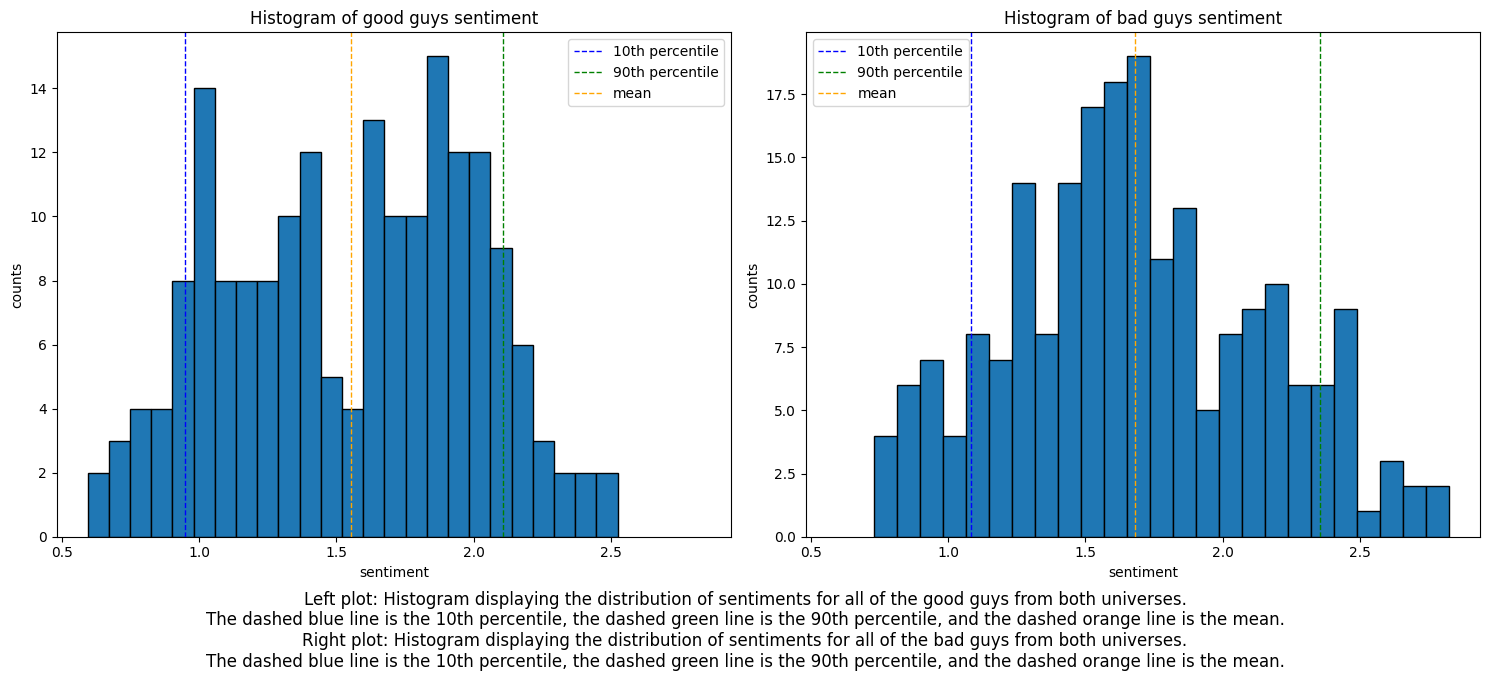

In [32]:
# Adjusting size
plt.rcParams['figure.figsize'] = [8.0, 6.0]

# Histogram for good and bad guys
gg_counts, gg_bins = np.histogram(gg_sent)
bg_counts, bg_bins = np.histogram(bg_sent)

# Setting same number of bins for both
number_of_bins = 10 

# Create two subplots and unpack the output array immediately
fig, axs = plt.subplots(1, 2, sharex=True)
fig.set_figwidth(15)

# Histogram for good guys
histogram = np.histogram(gg_sent, number_of_bins)

# Calculate values
mean_gg = np.mean(gg_sent) # Insert data
per_10th_gg = np.percentile(gg_sent, 10) # Insert data
per_90th_gg =  np.percentile(gg_sent, 90) # Insert data

axs[0].hist(gg_sent, bins = 25, edgecolor='black')
axs[0].set_title(f'Histogram of good guys sentiment')
axs[0].set_xlabel('sentiment')
axs[0].set_ylabel('counts')
axs[0].axvline(per_10th_gg, color='blue', linestyle='dashed', linewidth=1, label="10th percentile")
axs[0].axvline(per_90th_gg, color='green', linestyle='dashed', linewidth=1, label="90th percentile")
axs[0].axvline(mean_gg, color='orange', linestyle='dashed', linewidth=1, label="mean")
axs[0].legend()

# Histogram for bad guys
histogram = np.histogram(bg_sent, number_of_bins)

# Calculate values for plot
mean_bg = np.mean(bg_sent) # Insert data
per_10th_bg = np.percentile(bg_sent, 10) # Insert data
per_90th_bg =  np.percentile(bg_sent, 90) # Insert data

axs[1].hist(bg_sent, bins = 25, edgecolor='black')
axs[1].set_title(f'Histogram of bad guys sentiment')
axs[1].set_xlabel('sentiment')
axs[1].set_ylabel('counts')
axs[1].axvline(per_10th_bg, color='blue', linestyle='dashed', linewidth=1, label="10th percentile")
axs[1].axvline(per_90th_bg, color='green', linestyle='dashed', linewidth=1, label="90th percentile")
axs[1].axvline(mean_bg, color='orange', linestyle='dashed', linewidth=1, label="mean")
plt.figtext(.5,-0.12, f"Left plot: Histogram displaying the distribution of sentiments for all of the good guys from both universes.\nThe dashed blue line is the 10th percentile, the dashed green line is the 90th percentile, and the dashed orange line is the mean.\nRight plot: Histogram displaying the distribution of sentiments for all of the bad guys from both universes.\nThe dashed blue line is the 10th percentile, the dashed green line is the 90th percentile, and the dashed orange line is the mean.", ha='center', fontsize=12)
axs[1].legend()

# Print the calculated values
print(f"Good guys:\t\t\t\tBad guys:")
print(f"mean: {mean_gg}\t\tmean: {mean_bg}")
print(f"10th percentile: {per_10th_gg}\t10th percentile: {per_10th_bg}")
print(f"90th percentile: {per_90th_gg}\t90th percentile: {per_90th_bg}")

# Show both histrograms
plt.tight_layout()
plt.show()

> Again we see that overall the sentiments for both good and bad guys are pretty low. There seems to be a slight indication that bad guys actually have a higher sentiment than good guys, if we look at the calculated values.

**Finally use the label permutation test (see Week 5) to investigate the two hypotheses below**
- **H1: Good characters have a higher averge value for sentiment than a similarly sized set of randomly selected characters.**
- **H2: Bad characters have a lower average value for sentiment than a similarly sized set of randomly selected characters.**

> For the label permutation test we are using two lists. `characters` contains the character names and `alignments` contains 1's and 0's, a 1 indicates good and 0 indicates bad. The indeces of lists corrspond to the same character, such that the i'th character in `characters` has the alignment of the i'th index of `alignments`. This allows us to just make a random sample in `alignments` to reshuffle the labels for each character, since there will always be the same fraction of good and bad labels, and the character names are kept at the same indeces in the `characters` list:

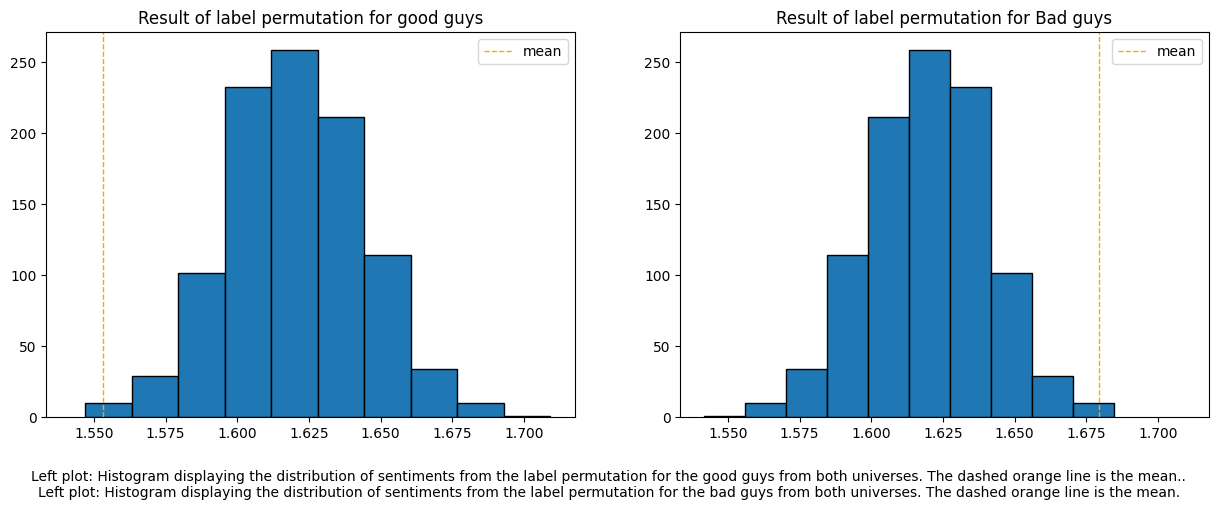

In [33]:
# Init lists to hold the values for each sample generated
average_sentiment_samples_good_guys = []
average_sentiment_samples_bad_guys = []

# Create 1000 samples
for n in range(1000):
    # We want to start by shuffling who is bad and good.
    alignments = random.sample(alignments, k=len(alignments))
    
    # We can then get the alignment of the nodes by finding their index in the characters list
    # and then looking up their (shuffled) alignment in the alignments list
    sent_bad = 0
    sent_good = 0
    
    #rem_c = []
    
    # Since we are taking a sample in the size of all the characters we have
    # we just go through all of the characters and check their sentiment and
    # newly assigned alignment (good/bad)
    for c in characters:
        a = alignments[characters.index(c)]
        if a == 1: # if its a good guy
            sent_good += G.nodes[c]["sentiment"]
        if a == 0: # if its a bad guy
            sent_bad += G.nodes[c]["sentiment"]
    
    # Divide the sum by the number of good/bad guys (in this sample)
    # Add this average to the average_sentiment_samples list
    average_sentiment_samples_good_guys.append(sent_good / len(good_guys))
    average_sentiment_samples_bad_guys.append(sent_bad / len(bad_guys))

# Plot a histogram of the averages
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
axs[0].hist(average_sentiment_samples_good_guys, bins = 10, edgecolor='black')
axs[0].axvline(mean_gg, color='orange', linestyle='dashed', linewidth=1, label="mean")
axs[0].set_title('Result of label permutation for good guys')
axs[0].legend()

axs[1].hist(average_sentiment_samples_bad_guys, bins = 10, edgecolor='black')
axs[1].axvline(mean_bg, color='orange', linestyle='dashed', linewidth=1, label="mean")
axs[1].set_title('Result of label permutation for Bad guys')
axs[1].legend()

plt.figtext(.5,-0.05, f"Left plot: Histogram displaying the distribution of sentiments from the label permutation for the good guys from both universes. The dashed orange line is the mean..\nLeft plot: Histogram displaying the distribution of sentiments from the label permutation for the bad guys from both universes. The dashed orange line is the mean.", ha='center')

plt.show()

**Write a short paragraph reflecting on your findings.**

> Our findings seem to further support what we observed when we were just looking at the good and bad guys previously. Namely that the good guys have a lower sentiment than the average character, and the bad guys have a higher sentiment than the average character. So based on this we would have to reject both H1 and H2, which seems a bit off. While this may simply be a case of the data that we have used, we want to make an argument for this and a tiny investigation into this:

**Bonus paragraphs: Argument and investigation**

> Argument: On one hand we suspect that this may not comepletely unlikely that the opposite of H1 and H2 is the case. Even though most heroes are more well documented with love affairs, families etc, they are also more likely to have a "sad" origin story, and have more well documented deaths of other characters around them. Since the heroes are usually the main characters they also appear in more stories, and as stated previously many of these stories may have titles containing "sad" words such as war, weapon, fight etc. On the other hand the villains may be less well documented, and appear in fewer comics. As such a villain that has its origin in an origin story love, fantasy, or protection of something, may get a higher sentiment, simply because it has fewer words, and a larger fraction of them are "happy". We are not comic book experts, so these are just some thoughts that might explain what we saw above.

In [34]:
# Are heroes more well documented than villains?
gg_doc = []
bg_doc = []

for char in characters:
    if char in good_guys:
        gg_doc.append(G.nodes[char]["txtlength"])
    if char in bad_guys:
        bg_doc.append(G.nodes[char]["txtlength"])

# Calculate mean, 10th perc, 90th perc for good guys
mean_gg = np.mean(gg_doc) 
per_10th_gg = np.percentile(gg_doc, 10)
per_90th_gg =  np.percentile(gg_doc, 90)

# Calculate mean, 10th perc, 90th perc for bad guys
mean_bg = np.mean(bg_doc) 
per_10th_bg = np.percentile(bg_doc, 10)
per_90th_bg =  np.percentile(bg_doc, 90) 

# Print the calculated values
print(f"Good guys:\t\t\tBad guys:")
print(f"mean: {mean_gg}\t\tmean: {mean_bg}")
print(f"10th percentile: {per_10th_gg}\t\t10th percentile: {per_10th_bg}")
print(f"90th percentile: {per_90th_gg}\t90th percentile: {per_90th_bg}")

Good guys:			Bad guys:
mean: 5178.720430107527		mean: 3963.1943127962086
10th percentile: 1197.5		10th percentile: 842.0
90th percentile: 11818.5	90th percentile: 8496.0


> So the good guys are better documented than the bad guys, in that they have longer texts describing them. Do they also have a higher fraction of negative words? Lets say the average happyness value for neutral is 5, then we count how large a fraction of the words for each character are negative and how many are positive:

In [35]:
# functions
def frac_sad(tokens):
    # Total sentiment score of file
    sent_sum = 0.0
    # Total number of occurences of words
    occ_sum = 0
    
    # For each token and associated number of occurences
    for token, occ in tokens.items():
        # If the token is in the given list of words with rated happiness
        for word, score in sent_list:
            if token == word and float(score) < 5:
                sent_sum += occ
        occ_sum += occ
    return sent_sum / occ_sum

def frac_hap(tokens):
        # Total sentiment score of file
    sent_sum = 0.0
    # Total number of occurences of words
    occ_sum = 0
    
    # For each token and associated number of occurences
    for token, occ in tokens.items():
        # If the token is in the given list of words with rated happiness
        for word, score in sent_list:
            if token == word and float(score) > 5:
                sent_sum += occ
        occ_sum += occ
    return sent_sum / occ_sum

In [36]:
gg_sad = []
bg_sad = []
gg_hap = []
bg_hap = []
uncommented = 0

# The code below has been commented out, since it takes a while to execute,
# the following 2 code cells are using the code that has been commented out
# in this cell. Hence, if this code is not uncommented the other will not 
# work properly, but we have written about our findings.

#for file in os.listdir("dc/"):
#    orig_character = file[:-4]
#    fileopener = open("dc/" + file, 'r')
#    text = fileopener.read()  
#    tokens = nltk.wordpunct_tokenize(BeautifulSoup(text, 'html.parser').get_text())
#    file_text = [w.lower() for w in tokens if w.isalpha()]
#    fdist = FreqDist(file_text)
#    if orig_character in good_guys:
#        gg_sad.append(frac_sad(fdist))
#        gg_hap.append(frac_hap(fdist))
#    if orig_character in bad_guys:
#        bg_sad.append(frac_sad(fdist))
#        bg_hap.append(frac_hap(fdist))
#       
#for file in os.listdir("marvel/"):
#    orig_character = file[:-4]
#    fileopener = open("marvel/" + file, 'r')
#    text = fileopener.read()  
#    tokens = nltk.wordpunct_tokenize(BeautifulSoup(text, 'html.parser').get_text())
#    file_text = [w.lower() for w in tokens if w.isalpha()]
#    fdist = FreqDist(file_text)
#    if orig_character in good_guys:
#        gg_sad.append(frac_sad(fdist))
#        gg_hap.append(frac_hap(fdist))
#    if orig_character in bad_guys:
#        bg_sad.append(frac_sad(fdist))
#        bg_hap.append(frac_hap(fdist))
#
#uncommented = 1

In [37]:
if uncommented == 1:
    # Calculate mean, 10th perc, 90th perc for good guys
    mean_gg = np.mean(gg_sad) 
    per_10th_gg = np.percentile(gg_sad, 10)
    per_90th_gg =  np.percentile(gg_sad, 90)

    # Calculate mean, 10th perc, 90th perc for bad guys
    mean_bg = np.mean(bg_sad) 
    per_10th_bg = np.percentile(bg_sad, 10)
    per_90th_bg =  np.percentile(bg_sad, 90) 

    # Print the calculated values
    print(f"Good guys:\t\t\t\tBad guys:")
    print(f"mean: {mean_gg}\t\tmean: {mean_bg}")
    print(f"10th percentile: {per_10th_gg}\t10th percentile: {per_10th_bg}")
    print(f"90th percentile: {per_90th_gg}\t90th percentile: {per_90th_bg}")

In [38]:
if uncommented == 1:
    # Calculate mean, 10th perc, 90th perc for good guys
    mean_gg = np.mean(gg_hap) 
    per_10th_gg = np.percentile(gg_hap, 10)
    per_90th_gg =  np.percentile(gg_hap, 90)

    # Calculate mean, 10th perc, 90th perc for bad guys
    mean_bg = np.mean(bg_hap) 
    per_10th_bg = np.percentile(bg_hap, 10)
    per_90th_bg =  np.percentile(bg_hap, 90) 

    # Print the calculated values
    print(f"Good guys:\t\t\t\tBad guys:")
    print(f"mean: {mean_gg}\t\tmean: {mean_bg}")
    print(f"10th percentile: {per_10th_gg}\t10th percentile: {per_10th_bg}")
    print(f"90th percentile: {per_90th_gg}\t90th percentile: {per_90th_bg}")

In [39]:
# Lastly we just want to check how many characters are in the two lists
print(f"Number of good guys = {len(good_guys)}")
print(f"Number of bad guys = {len(bad_guys)}")

Number of good guys = 186
Number of bad guys = 211


> We found that the the good guys had a lower fraction of "sad" words and a higher fraction of "happy" words. Which conincides with the original H1 and H2. Hence our idea for an alternative hapythesis may be incorrect. We also considered that it might have been caused by us having a much lower number of characters in one of the groups, but as can be seen above, this is not the case. 